# Exploratory Data Analysis on New York City Airbnb Listings 2024 Dataset


## Acknowledgements
The EDA is performed on the Airbnb Listings dataset of New York City (5 January, 2024).

The original dataset can be found [here](https://insideairbnb.com/get-the-data/).

## Objectives
- Exploration and cleaning of the dataset
- Visualization of the relationships among different attributes

## Loading Data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount the dataset
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='UUKSvMLHldE8sLSXMzb6PWbOvDnUxoCJiuBiwiqaZcEE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'airbnblistingseda-donotdelete-pr-ra5ga6dopqtkg5'
object_key = 'airbnb_listings_nyc.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

nyc = pd.read_csv(body)


## Understanding and Cleaning Data

In [3]:
# display the shape of the dataset
nyc.shape

(29091, 18)

In [4]:
# display the first few rows of the dataset
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,743430766348459803,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,83422715,D,Brooklyn,Flatbush,40.65375,-73.95502,Entire home/apt,289.0,30,0,NaN,NaN,1,365,0,NaN
1,11943,Home in Brooklyn · 1 bedroom · 2 beds · 1 bath,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150.0,30,0,NaN,NaN,1,0,0,NaN
2,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,NaN
3,13440481,Rental unit in New York · 1 bedroom · 1 bed · ...,17385374,Dennis J.,Manhattan,Upper East Side,40.76550,-73.97080,Private room,301.0,30,0,NaN,NaN,1,0,0,NaN
4,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,NaN


In [5]:
# display columns and their data types
nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
# rename 'neighbourhood_group' to 'town'
nyc = nyc.rename(columns={'neighbourhood_group': 'town'})

In [7]:
# review the columns
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'town', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
# remove duplicate rows if any
nyc.duplicated().sum()
nyc.drop_duplicates(inplace=True)

In [9]:
# find out if there are any null values in the dataset
nyc.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
town                                  0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8333
reviews_per_month                  8333
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           24726
dtype: int64

In [10]:
# drop the insignificant columns
nyc.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

# review changes
nyc.head()

,host_id,town,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,83422715,Brooklyn,Flatbush,40.65375,-73.95502,Entire home/apt,289.0,30,0,NaN,1,365,0,NaN
1,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150.0,30,0,NaN,1,0,0,NaN
2,7130382,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,30,3,0.03,1,0,0,NaN
3,17385374,Manhattan,Upper East Side,40.76550,-73.97080,Private room,301.0,30,0,NaN,1,0,0,NaN
4,51501835,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,30,9,0.24,139,364,2,NaN


In [11]:
# replace null values in 'reviews_per_month' with 0
nyc.fillna({'reviews_per_month': 0}, inplace=True)

In [12]:
# replace null values in 'license' with 'No License'
nyc.fillna({'license': 'No License'}, inplace=True)

In [13]:
# review dataset for null values
nyc.isnull().sum()

host_id                           0
town                              0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [14]:
# get concise information about the dataset
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29091 entries, 0 to 29090
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         29091 non-null  int64  
 1   town                            29091 non-null  object 
 2   neighbourhood                   29091 non-null  object 
 3   latitude                        29091 non-null  float64
 4   longitude                       29091 non-null  float64
 5   room_type                       29091 non-null  object 
 6   price                           29091 non-null  float64
 7   minimum_nights                  29091 non-null  int64  
 8   number_of_reviews               29091 non-null  int64  
 9   reviews_per_month               29091 non-null  float64
 10  calculated_host_listings_count  29091 non-null  int64  
 11  availability_365                29091 non-null  int64  
 12  number_of_reviews_ltm           

In [15]:
# examine continuous variables
nyc.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.909100e+04,29091.000000,29091.000000,29091.000000,29091.000000,29091.000000,29091.000000,29091.000000,29091.000000,29091.000000
mean,1.929188e+08,40.729017,-73.942690,212.542848,29.577842,30.427796,0.897587,53.592211,209.536901,7.743563
std,1.816742e+08,0.058425,0.058887,946.727253,33.708459,65.060709,1.706453,144.259339,134.999867,18.695908
min,1.678000e+03,40.500314,-74.251907,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.315537e+07,40.687365,-73.982350,79.000000,30.000000,0.000000,0.000000,1.000000,87.000000,0.000000
50%,1.304733e+08,40.728210,-73.952556,128.000000,30.000000,5.000000,0.260000,2.000000,237.000000,1.000000
75%,3.610108e+08,40.763177,-73.920759,210.000000,30.000000,30.000000,1.220000,12.000000,354.000000,8.000000
max,5.539914e+08,40.911380,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000


In [16]:
# display unique values of town
nyc.town.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [17]:
# examine the number of unique values of neighbourhood
len(nyc.neighbourhood.unique())

222

In [18]:
# display unique values of room_type
nyc.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [19]:
# examine the number of unique values of license
len(nyc.license.unique())

937

## Visualizing Data

In [20]:
# display the number of listings in each town
nyc.town.value_counts()

Manhattan        12547
Brooklyn         10081
Queens            4904
Bronx             1216
Staten Island      343
Name: town, dtype: int64

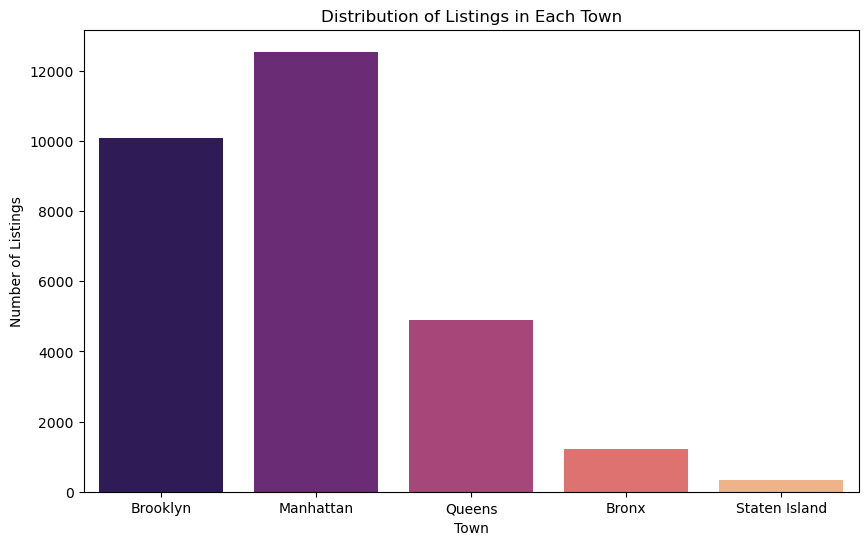

In [21]:
# count plot for distribution of listings in each town
plt.figure(figsize=(10, 6))
sns.countplot(x='town', data=nyc, palette='magma')
plt.title('Distribution of Listings in Each Town')
plt.xlabel('Town')
plt.ylabel('Number of Listings')
plt.show()

In [22]:
# display the count of each room_type
nyc.room_type.value_counts()

Entire home/apt    15489
Private room       13019
Shared room          412
Hotel room           171
Name: room_type, dtype: int64

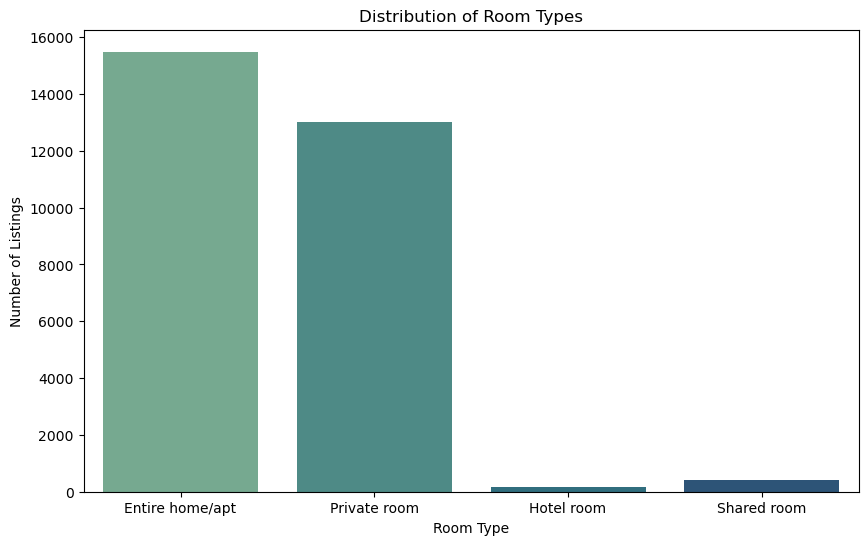

In [23]:
# count plot for distribution of room_type
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=nyc, palette='crest')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

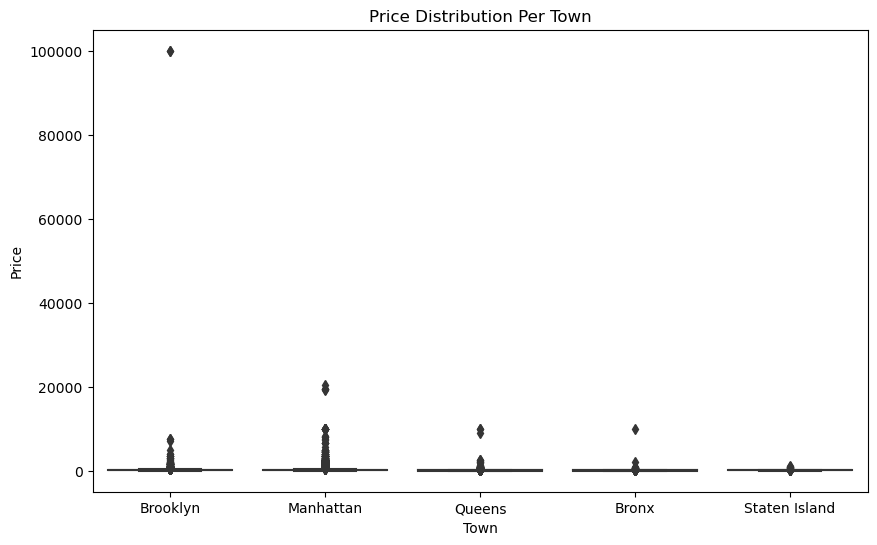

In [24]:
# box plot for price per town
plt.figure(figsize=(10, 6))
sns.boxplot(x='town', y='price', data=nyc, palette='viridis')
plt.title('Price Distribution Per Town')
plt.xlabel('Town')
plt.ylabel('Price')
plt.show()

In [25]:
# display summary stats for price
print("Mean = %s" % (np.mean(nyc.price)))
print("Max = %s" % (np.max(nyc.price)))
print("Min = %s" % (np.min(nyc.price)))
print("Median = %s" % (np.median(nyc.price)))
print("Standard Dev = %s" % (np.std(nyc.price)))

Mean = 212.54284830359904
Max = 100000.0
Min = 10.0
Median = 128.0
Standard Dev = 946.7109813537847


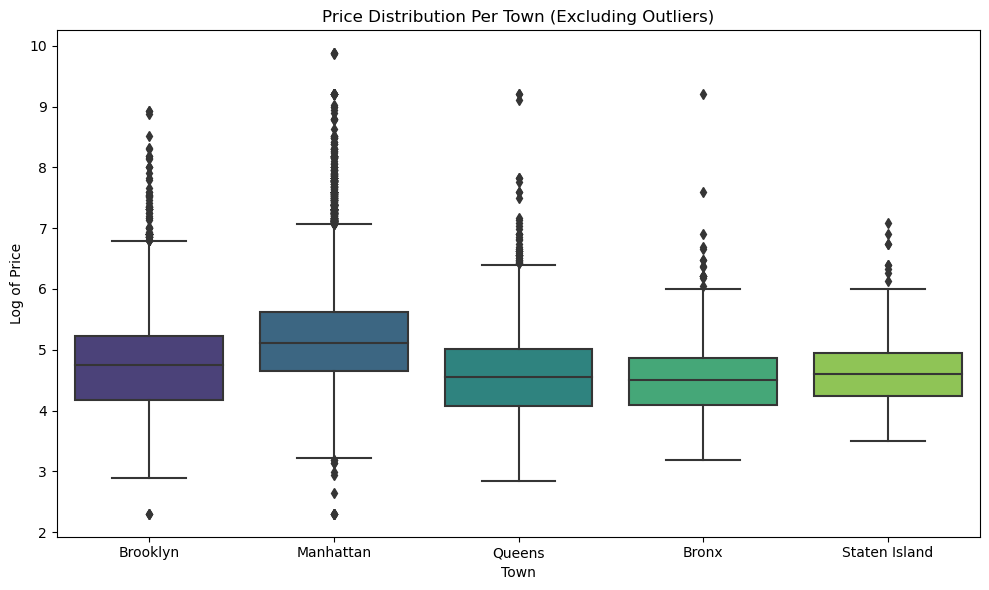

In [26]:
# Removing the outliers and plotting again, this time with log of price to get a clearer understanding
plt.figure(figsize=(10, 6))
nyc = nyc.query("price < 20000")
nyc['log_price'] = np.log(nyc['price'])
sns.boxplot(x='town', y='log_price', data=nyc, palette='viridis')
plt.title('Price Distribution Per Town (Excluding Outliers)')
plt.xlabel('Town')
plt.ylabel('Log of Price')
plt.tight_layout()
plt.show()

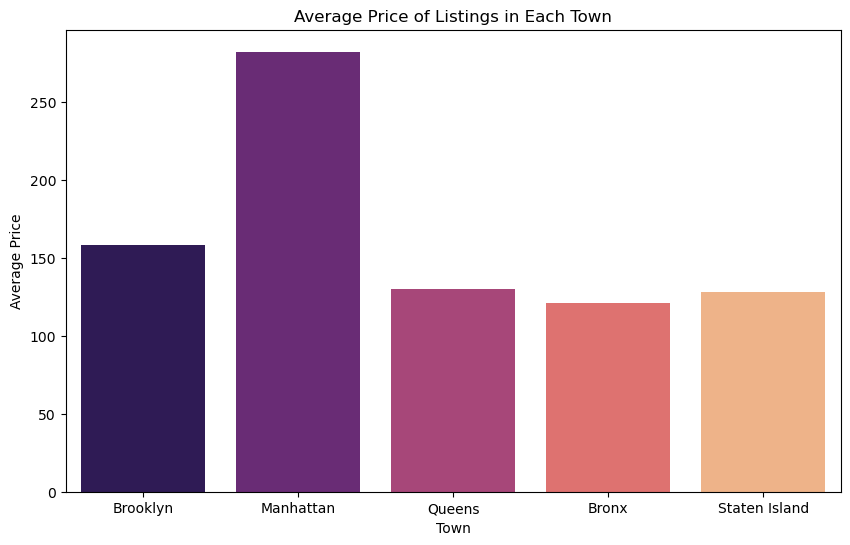

In [27]:
# bar plot for average price of listings in each town
plt.figure(figsize=(10, 6))
sns.barplot(x='town', y='price', data=nyc, palette='magma', errorbar=None)
plt.title('Average Price of Listings in Each Town')
plt.xlabel('Town')
plt.ylabel('Average Price')
plt.show()

In [28]:
# check the number of listings above the mean price
meanprice = str(np.mean(nyc.price))
len(nyc.query("price >= " + meanprice))

7525

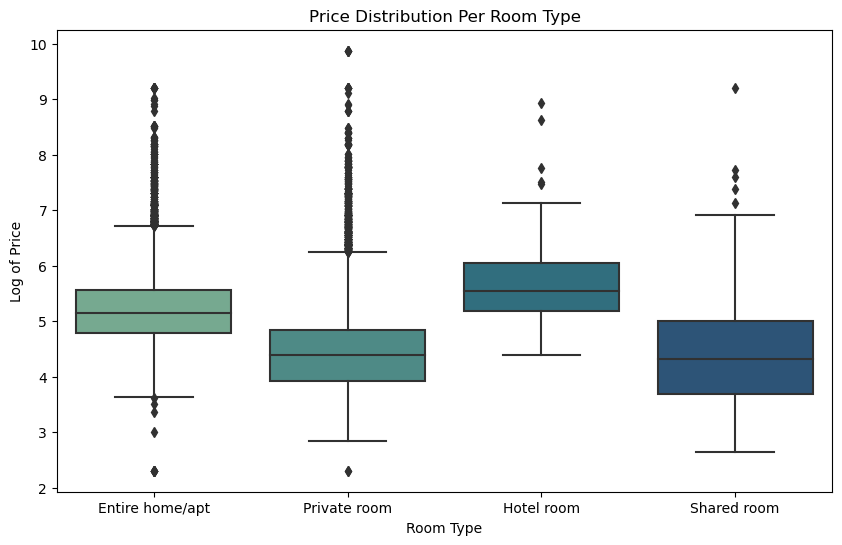

In [29]:
# box plot for correlation between room_type and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='log_price', data=nyc, palette='crest')
plt.title('Price Distribution Per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log of Price')
plt.show()

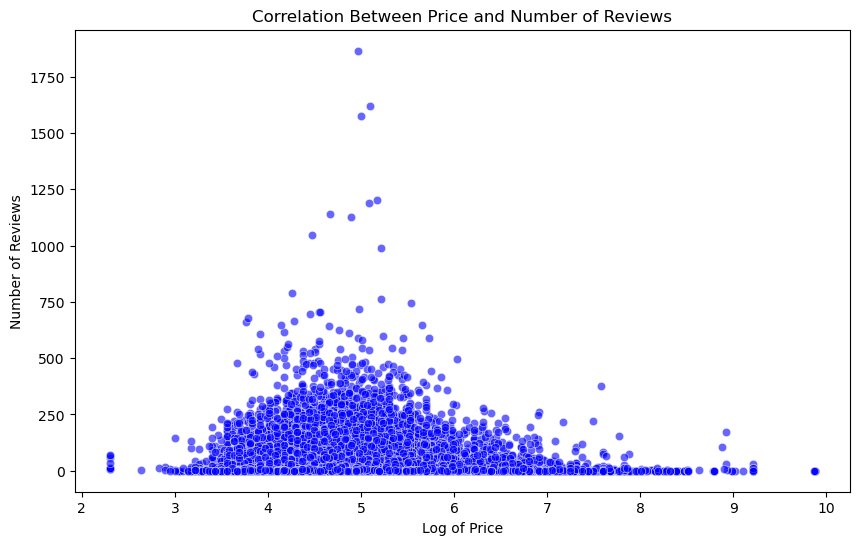

In [30]:
# scatter plot for correlation between price and number_of_reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_price', y='number_of_reviews', data=nyc, alpha=0.6, color='blue')
plt.title('Correlation Between Price and Number of Reviews')
plt.xlabel('Log of Price')
plt.ylabel('Number of Reviews')
plt.show()

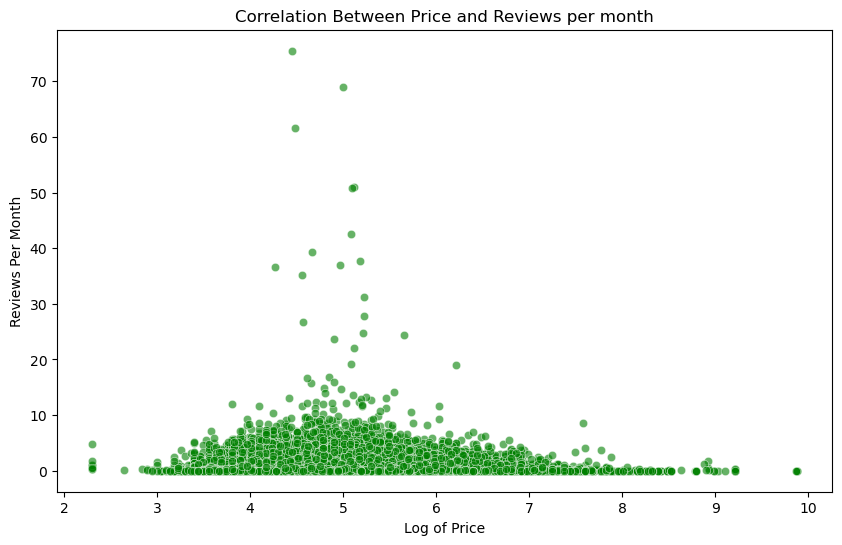

In [31]:
# scatter plot for correlation between price and reviews_per_month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_price', y='reviews_per_month', data=nyc, alpha=0.6, color='green')
plt.title('Correlation Between Price and Reviews per month')
plt.xlabel('Log of Price')
plt.ylabel('Reviews Per Month')
plt.show()

In [32]:
# group the listings based on license
has_license = []
for i in nyc["license"]:
    if i == "No License":
      has_license.append("No License")
    elif i == "Exempt":
      has_license.append("Exempt")
    else:
      has_license.append("License Permitted")
nyc["has_license"] = has_license
nyc.has_license.value_counts()

No License           24724
Exempt                3135
License Permitted     1229
Name: has_license, dtype: int64

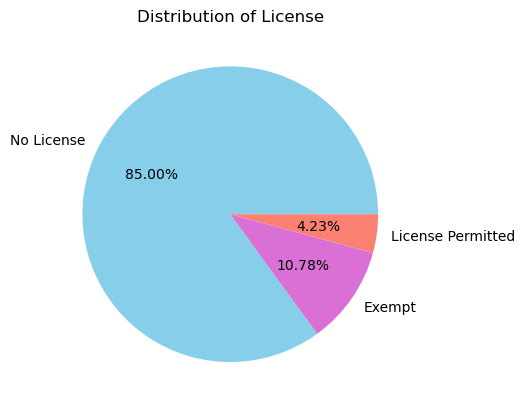

In [33]:
# pie chart for distribution of license among the listings
license_data = nyc.has_license.value_counts()
plt.pie(license_data, labels=['No License','Exempt', 'License Permitted'], autopct='%.2f%%', colors=['skyblue', 'orchid', 'salmon'])
plt.title('Distribution of License')
plt.show()

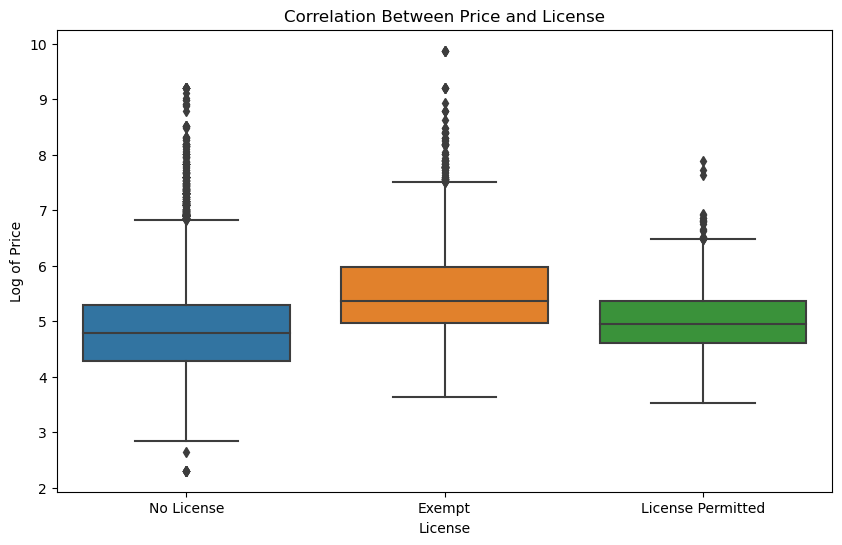

In [34]:
# box plot for correlation between price and license
plt.figure(figsize=(10, 6))
sns.boxplot(nyc, x = "has_license", y = "log_price")
plt.title('Correlation Between Price and License')
plt.xlabel('License')
plt.ylabel('Log of Price')
plt.show()

Index(['host_id', 'town', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'log_price',
       'has_license'],
      dtype='object')

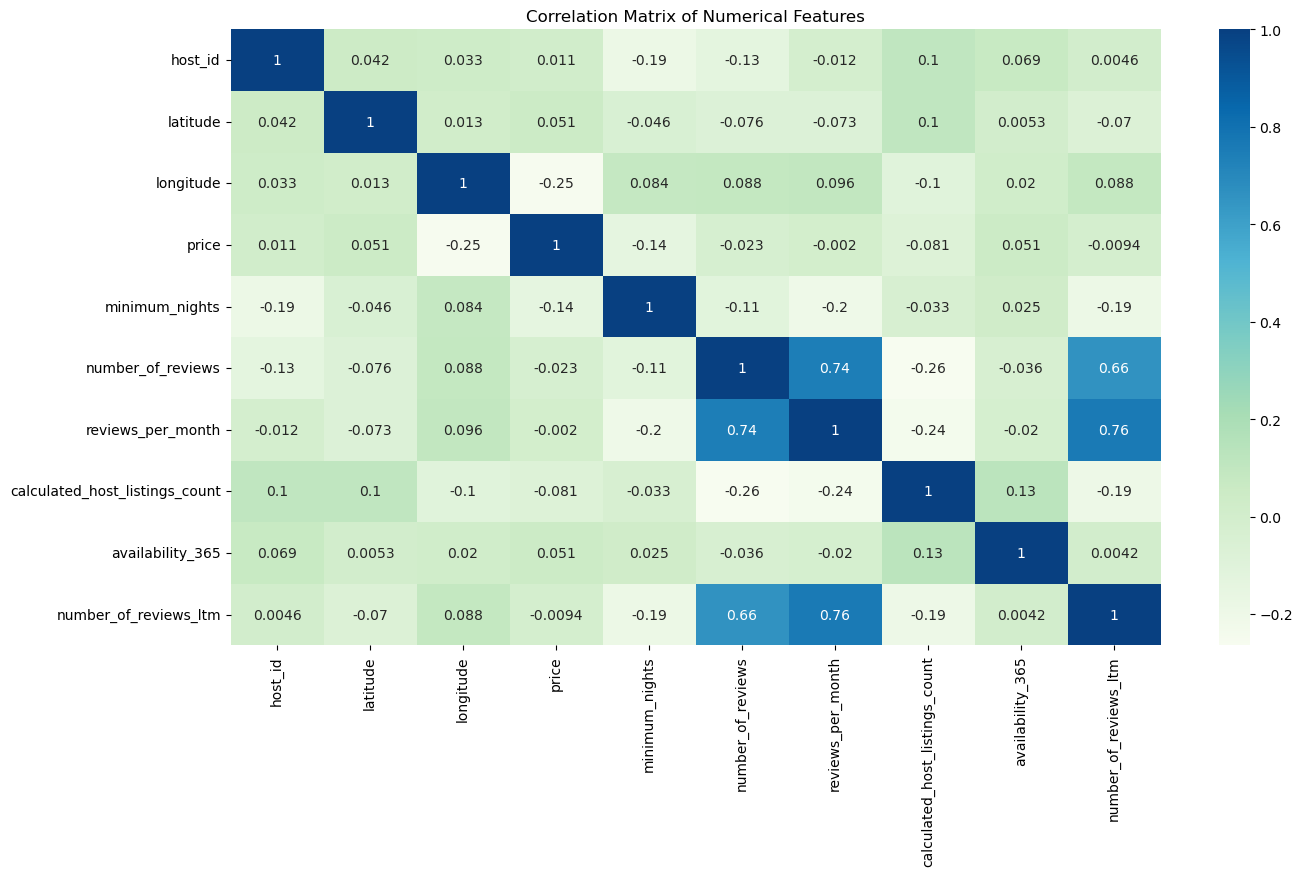

In [35]:
# heat map for correlation between numerical attributes
nyc_map = nyc.iloc[:, 0:14]
corr = nyc_map.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='GnBu')
plt.title('Correlation Matrix of Numerical Features')
nyc.columns

## References
- [Kaggle Dataset 1](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)
- [Kaggle Dataset 2](https://www.kaggle.com/datasets/vrindakallu/new-york-dataset/data)

## Author
[Sarthak Kumar Das](https://www.linkedin.com/in/sarthak-kumar-das/)